# Определение перспективного тарифа для телеком компании

«Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нужно предварительный анализ тарифов на небольшой выборке клиентов. В  распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


### Шаг 1. Изучение  файлы с данными 

In [11]:
from scipy import stats as st
import numpy as np
import pandas as pd
import os


In [12]:
path = r'C:\Users\Asus\Documents\Python Scripts\github praktikum\03 Статистический анализ данных'

data_calls = pd.read_csv(path +'/calls.csv')
data_internet = pd.read_csv(path +'/internet.csv')
data_messages = pd.read_csv(path +'/messages.csv')
data_tariffs = pd.read_csv(path +'/tariffs.csv')
data_users = pd.read_csv(path + '/users.csv')

data_calls.name = 'data_calls'
data_internet.name = 'data_internet'
data_messages.name = 'data_messages'
data_tariffs.name = 'data_tariffs'
data_users.name = 'data_users'

for df in data_calls, data_internet, data_messages, data_tariffs, data_users:
    print(df.head())
    print()
    print(df.info())
    print()

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null flo

### Вывод

Инфрмация находится в пяти разных датасетах. В набор данных 'data_calls', 'data_internet', 'data_messages' и 'data_users' присутсвует пропущеные значения которые предстоит обработать.

### Шаг 2. Предобработка данных

In [13]:
# Обработка пропусков
dfs = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for df in dfs :
    df_nan = df.isna().sum() 
    print('\n', df.name,'\n')
    print('Количество пропушеных строк :',df_nan)
    df_part = df_nan / len(df)
    print('Доля пропушеных строк :',df_part)
    df_duplicated =  df.duplicated().sum()
    print('Количество дубликатов :', df_duplicated)
    


 data_calls 

Количество пропушеных строк : id           0
call_date    0
duration     0
user_id      0
dtype: int64
Доля пропушеных строк : id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64
Количество дубликатов : 0

 data_internet 

Количество пропушеных строк : id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
Доля пропушеных строк : id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64
Количество дубликатов : 0

 data_messages 

Количество пропушеных строк : id              0
message_date    0
user_id         0
dtype: int64
Доля пропушеных строк : id              0.0
message_date    0.0
user_id         0.0
dtype: float64
Количество дубликатов : 0

 data_tariffs 

Количество пропушеных строк : messages_included        0
mg_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute        

### Вывод

В таблицах нужно изменить формат данных даты из типа объекта в тип время. Пропущеные значения NaN на единицу в столбце churn_date посколько в тех. зандание описано что - если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Не обнаружили дубликаты в датасетах.

### Замена типа данных


In [18]:
#date_format = [data_users.churn_date, data_calls.call_date, data_messages.message_date, data_internet.session_date ]

#date_format =map(pd.to_datetime,(date_format))

data_users.churn_date, data_calls.call_date, data_messages.message_date, data_internet.session_date = map(pd.to_datetime,(data_users.churn_date, data_calls.call_date, data_messages.message_date, data_internet.session_date ))
# Расмотрим на заменя тип 
for df in data_users, data_calls, data_messages , data_internet :
    print( df.name, '\n')
    print(df.info(), '\n')
    

data_users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None 

data_calls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None 

data_messages 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
m

### Вывод

Заменяем формат даты для того что обработать в далнейщем. 

### Обработка данных для расчетеов

In [19]:
# Группировка звонки длительности 0 с.
zero_calls = data_calls.query( 'duration == 0')
print(zero_calls.shape)
print()

data_internet['gb_used'] = (data_internet['mb_used'] / 1024 )
data_internet['month'] = data_internet['session_date'].dt.month

data_internet.head()

(39613, 4)



,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,1000_2,1197.26,2018-06-25,1000,1.169199,6
3,1000_3,550.27,2018-08-22,1000,0.537373,8
4,1000_4,302.56,2018-09-24,1000,0.295469,9


### Вывод
 
 Скорее всего звонки которые регистрировались с длительностью 0.0, это пропущеные звонки, поскольку в тариф не написано стооимость таких звонков, для дальнейшено анализа их сохраняем в отдельную датафрейм 'zero_calls'. Данные со длительностью звонков отличающихся от 0 сохраняем в датафрэйм 'calls_clean'



In [20]:
# Расчет доля звонков длительности больше 0 с.
print('Доля звонков длителности 0.0 : {:.2%}'.format( len(zero_calls) /len(data_calls) ) )
print()

Доля звонков длителности 0.0 : 19.55%



In [21]:
# Округление длитеоьности звонков в больше сторонк 0 с.
data_calls['rounded_calls'] = data_calls['duration'].apply(np.ceil)
data_calls.head()

,id,call_date,duration,user_id,rounded_calls
0,1000_0,2018-07-25,0.00,1000,0.0
1,1000_1,2018-08-17,0.00,1000,0.0
2,1000_2,2018-06-11,2.85,1000,3.0
3,1000_3,2018-09-21,13.80,1000,14.0
4,1000_4,2018-12-15,5.18,1000,6.0


In [22]:
# Группируем звонки длительности больше 0 с.
calls = data_calls.query( 'duration != 0')
calls.head()

,id,call_date,duration,user_id,rounded_calls
2,1000_2,2018-06-11,2.85,1000,3.0
3,1000_3,2018-09-21,13.80,1000,14.0
4,1000_4,2018-12-15,5.18,1000,6.0
7,1000_7,2018-08-22,18.31,1000,19.0
8,1000_8,2018-09-15,18.44,1000,19.0


In [23]:
# Преобразуем Мб в Гб с.
data_internet['gb_used'] = (data_internet['mb_used'] / 1024 ).round(2)

# Образуем столбец - месяц. Дбавляем в датасет интернета.
data_internet['month'] = data_internet['session_date'].dt.month

data_internet.head()

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,0.11,11
1,1000_1,1052.81,2018-09-07,1000,1.03,9
2,1000_2,1197.26,2018-06-25,1000,1.17,6
3,1000_3,550.27,2018-08-22,1000,0.54,8
4,1000_4,302.56,2018-09-24,1000,0.30,9


## Расчет для каждого пользователя

Расчет для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя


In [24]:
# Добавление столбцы с указанием на месяц
data_messages['month'] = data_messages['message_date'].dt.month
calls['month'] = calls['call_date'].dt.month



C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Соединяем таблицу с данными о клиентах и звонков.
pivot_users = data_users[['user_id','tariff', 'city']]
data_merge =  calls.merge(pivot_users, on='user_id', how='left')
data_merge.head()

,id,call_date,duration,user_id,rounded_calls,month,tariff,city
0,1000_2,2018-06-11,2.85,1000,3.0,6,ultra,Краснодар
1,1000_3,2018-09-21,13.80,1000,14.0,9,ultra,Краснодар
2,1000_4,2018-12-15,5.18,1000,6.0,12,ultra,Краснодар
3,1000_7,2018-08-22,18.31,1000,19.0,8,ultra,Краснодар
4,1000_8,2018-09-15,18.44,1000,19.0,9,ultra,Краснодар


In [26]:
# Создаем свобные таблицы звонков длительности больше чем 0 с по пользователям и месяцам. Выводим счет и сумму значений.
pivot_calls = calls.pivot_table(index = ['user_id','month'], values = 'rounded_calls' , aggfunc= ['count','sum'])
pivot_calls.head()


count           sum
              rounded_calls rounded_calls
user_id month                            
1000    5                17         159.0
        6                28         172.0
        7                41         340.0
        8                42         408.0
        9                46         466.0

In [27]:
# Создаем свобные таблицы сообщений  по пользователям и месяцам. Выводим счет.
pivot_messages = data_messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc= ['count'])
pivot_messages.head()

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57

In [28]:
# Создаем свобные таблицы трафика интернета по пользователям и месяцам. Выводим сумму трафика.
pivot_internet = data_internet.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc= ['sum'])
pivot_internet.head()

sum
              gb_used
user_id month        
1000    5        2.19
        6       22.68
        7       13.71
        8       13.74
        9       14.25

In [29]:
# Соединиаем полученные данные сгрупированые по месяцам в один датасет.
# Применяем метод merge к датасетам сводным таблицам ранее подготовленые
usage_merge = pivot_calls.merge(pivot_messages, on =['user_id','month'] , how = 'left')

sample_data = usage_merge.merge(pivot_internet,  on = ['user_id','month'], how = 'left')


# Переменуем столбцы датасета
sample_data.columns = ['call_count', 'call_minutes', 'sms_count', 'gb_used']

sample_data.head()

call_count  call_minutes  sms_count  gb_used
user_id month                                              
1000    5              17         159.0       22.0     2.19
        6              28         172.0       60.0    22.68
        7              41         340.0       75.0    13.71
        8              42         408.0       81.0    13.74
        9              46         466.0       57.0    14.25

In [30]:
#Получаем датасет для расчета выручки клиентов по месяцам и тарифам кажлого пользователя
full_data = sample_data.join(pivot_users.set_index('user_id'), on = ['user_id'] , how='left').reset_index().fillna(0)

full_data.head(10)



,user_id,month,call_count,call_minutes,sms_count,gb_used,tariff,city
0,1000,5,17,159.0,22.0,2.19,ultra,Краснодар
1,1000,6,28,172.0,60.0,22.68,ultra,Краснодар
2,1000,7,41,340.0,75.0,13.71,ultra,Краснодар
3,1000,8,42,408.0,81.0,13.74,ultra,Краснодар
4,1000,9,46,466.0,57.0,14.25,ultra,Краснодар
5,1000,10,44,350.0,73.0,14.36,ultra,Краснодар
6,1000,11,37,338.0,58.0,14.39,ultra,Краснодар
7,1000,12,38,333.0,70.0,9.56,ultra,Краснодар
8,1001,11,45,430.0,0.0,17.98,smart,Москва
9,1001,12,47,414.0,0.0,13.71,smart,Москва


In [31]:
data_tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [32]:
#Функция расчета помесячную выручку по звонкам
def revenue_calls (df):
    tariff = df['tariff']
    if tariff == 'smart':
        extra_minutes = df['call_minutes'] - data_tariffs.loc[0,'minutes_included']
        if extra_minutes > 0 :
            call_cost =  data_tariffs.loc[0,'minutes_included'] + extra_minutes*data_tariffs.loc[0,'rub_per_message']
        else :
            call_cost = data_tariffs.loc[0,'rub_monthly_fee']
    elif tariff == 'ultra':
        extra_minutes = df['call_minutes'] - data_tariffs.loc[1,'minutes_included']
        if extra_minutes > 0 :
            call_cost =  data_tariffs.loc[1,'minutes_included'] + extra_minutes*data_tariffs.loc[1,'rub_per_message']
        else :
            call_cost = data_tariffs.loc[1,'rub_monthly_fee']
    return call_cost



In [33]:
#Функция расчета помесячную выручку по сообщениям
def revenue_sms (df):
    tariff = df['tariff']
    if tariff == 'smart':
        extra_sms = df['sms_count'] - data_tariffs.loc[0, 'messages_included']
        if extra_sms > 0 :
            cost_sms =  extra_sms*data_tariffs.loc[0, 'rub_per_message']
        else :
            cost_sms = 0
    elif tariff == 'ultra':
        extra_sms = df['sms_count'] - data_tariffs.loc[1, 'messages_included']
        if extra_sms > 0 :
            cost_sms =  extra_sms*data_tariffs.loc[1, 'rub_per_message']
        else :
            cost_sms = 0
    return cost_sms



In [34]:
#Функция расчета помесячную выручку по Гб
def revenue_gb (df):
    tariff = df['tariff']
    if tariff == 'smart':
        extra_gb = df['gb_used'] - data_tariffs.loc[0, 'mg_per_month_included']/1024
        if extra_gb > 0 :
            cost_gb =  (extra_gb)*data_tariffs.loc[0, 'rub_per_gb']
        else :
            cost_gb = 0
    elif tariff == 'ultra':
        extra_gb = df['gb_used'] - data_tariffs.loc[1, 'mg_per_month_included']/1024
        if extra_gb > 0 :
            cost_gb =  (extra_gb)*data_tariffs.loc[1, 'rub_per_gb']
        else :
            cost_gb = 0
    return cost_gb

In [36]:
#  Складиваем помесячную выручку пользователей по звонкам, сообщений и трафика интернета
full_data['revenue_month'] = ( full_data.apply(revenue_calls, axis = 1)+

 full_data.apply(revenue_sms, axis = 1) +

 full_data.apply(revenue_gb, axis = 1) )


full_data.head(10)

,user_id,month,call_count,call_minutes,sms_count,gb_used,tariff,city,revenue_month
0,1000,5,17,159.0,22.0,2.19,ultra,Краснодар,1950.0
1,1000,6,28,172.0,60.0,22.68,ultra,Краснодар,1950.0
2,1000,7,41,340.0,75.0,13.71,ultra,Краснодар,1950.0
3,1000,8,42,408.0,81.0,13.74,ultra,Краснодар,1950.0
4,1000,9,46,466.0,57.0,14.25,ultra,Краснодар,1950.0
5,1000,10,44,350.0,73.0,14.36,ultra,Краснодар,1950.0
6,1000,11,37,338.0,58.0,14.39,ultra,Краснодар,1950.0
7,1000,12,38,333.0,70.0,9.56,ultra,Краснодар,1950.0
8,1001,11,45,430.0,0.0,17.98,smart,Москва,1146.0
9,1001,12,47,414.0,0.0,13.71,smart,Москва,550.0


### Шаг 3. Анализ  данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


In [37]:
#Группировка данных по тарифам и месяцам с  расчетом средное значение
stat_data = full_data.groupby(['tariff', 'month']).mean().round(2)

stat_data.columns = ['user_id', 'count_calls', 'calls', 'sms', 'gb', 'revenue']

stat_data.head()


user_id  count_calls   calls    sms     gb  revenue
tariff month                                                     
smart  1      1264.45        22.55  210.03  17.94   8.30   704.52
       2      1280.90        32.57  298.69  24.09  11.33   794.02
       3      1256.79        43.84  390.05  31.86  14.75  1100.83
       4      1245.78        41.82  370.44  30.59  13.09   902.31
       5      1239.27        44.20  387.36  33.77  15.43  1130.36

In [168]:
def add_row(df,ls):
    """
    Given a dataframe and a list, append the list as a new row to the dataframe.

    :param df: <DataFrame> The original dataframe
    :param ls: <list> The new row to be added
    :return: <DataFrame> The dataframe with the newly appended row
    """

    num_el = len(ls)

    new_row = pd.DataFrame(np.array(ls).reshape(1,num_el), columns = list(df.columns))

    df = df.append(new_row, ignore_index=True)

    return df

In [169]:
# Группировка по тарифу смарт
smart = stat_data.query('tariff == "smart"')

#Пустой датафрэйм куда запишем результаты описательной ститистики 
results = pd.DataFrame(columns = smart.columns)

# Расчет среднего значения тарифа Смарта 
smart_mean = []
for column in smart:
    mean = smart[column].mean()
    smart_mean.append(round(mean,2))
    
results = add_row(results,smart_mean)

In [170]:
# Расчет дисперсии тарифа смарта тарифа Смарта

smart_variance = []
for column in smart:
    variance = np.var(smart[column], ddof= 1)
    smart_variance.append(round(variance,2))

results = add_row(results,smart_variance)


In [171]:
# Расчет стандартного отклонения тарифа смарта тарифа Смарта

smart_std = []
for column in smart:
    standart_deviation = np.std(smart[column], ddof= 1)
    smart_std.append(round(standart_deviation,2))


results = add_row(results,smart_std)



In [172]:
# Группировка по тарифу смарт
ultra = stat_data.query('tariff == "ultra"')

# Расчет среднего значения  тарифа Ультра

ultra_mean = []
for column in stat_data:
    mean = ultra[column].mean()
    ultra_mean.append(round(mean,2))

results = add_row(results, ultra_mean)

In [173]:
# Расчет дисперсии тарифа ультра тарифа Ультра

ultra_var = []
for column in ultra:
    variance = np.var(ultra[column], ddof= 1)
    ultra_var.append(round(variance,2))

results = add_row(results, ultra_var)

In [174]:
# Расчет стандартного отклонения тарифа смарта тарифа ультра"

ultra_std = []
for column in ultra:
    standart_deviation = np.std(ultra[column], ddof= 1)
    ultra_std.append(round(standart_deviation,2))
    
results = add_row(results, ultra_std)

In [188]:
values = ['mean', 'variance', 'std']
tariffs = ['smart', 'ultra']
ind = pd.MultiIndex.from_product([tariffs, values],
                           names=['tarrif', 'values'])



stat_results = pd.DataFrame(results.values, columns = results.columns, index = ind).drop(['user_id','count_calls'], axis = 1)

stat_results

calls     sms     gb   revenue
tarrif values                                    
smart  mean       388.40   31.38  14.70   1113.88
       variance  5082.12   26.82   6.84  47687.21
       std         71.29    5.18   2.61    218.37
ultra  mean       513.71   43.31  17.85   2040.08
       variance  6824.61  142.24   7.82   2921.51
       std         82.61   11.93   2.80     54.05

### Вывод

Из полученых результатов можно описать поведение пользователей следующим образом: пользователи тарифа смарт в среднем пользуются 388,4 мин разгавора, 31 смс и 14,7 Гб интернет-трафика. Пользователей тарифа ультра в среднем пользуются 513,71 мин разгавора, 43,31 смс и 17,85 Гб интернет-трафика. То есть в среднем минуты разгавора включены в тариф удевлетворяют нужды пользователей, так же в среднем количества смс включены в тарифе больше чем количество смс отправленых в среднем. 
<br>

В тарифе смарта средный потребляемый интернет трафик близко к интернет-трафику включен в тарифе. Используя диапазон нормалного распределения можно утвердить что интервал потребления интернет трафика составляет для тарифа смарта составляет от 6,85Гб до 22,6 Гб. Это означает что часть пользователей докупает интернет-трафик.

<br>
А пользователи тарифа ультра потребляемый интернет трафик не приближается к интернет-трафику включен в тариф. Можно утвердить что интервал потребления интернет трафика  для тарифа ультра составляет от 10.07 Гб до 26.09 Гб. Это означает что пользователей данного тарифа не покуапают допольнительный интернет-трафик.


In [232]:
import matplotlib.pyplot as plt
# Дата данных для построения гистограммы плотностей тарифа смарта
features  = ['calls' ,  'sms' , 'gb', 'revenue']


    

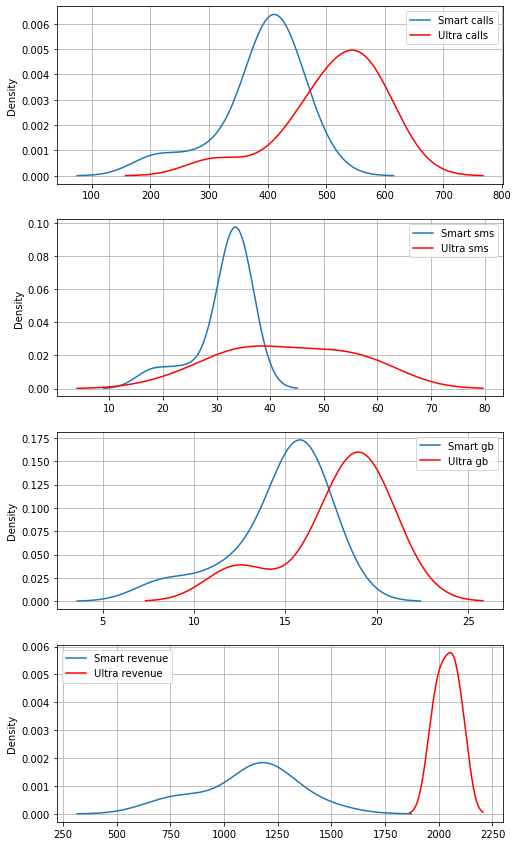

In [231]:
fig, ax = plt.subplots(4)
for num, name in enumerate(features):
    smart[name].plot(ax = ax[num], kind = 'density' , figsize = (8,15), grid =True , label = f'Smart {name}')
    ax[num].legend()
    
    ultra[name].plot(ax = ax[num],kind = 'density' , figsize = (8,15), grid =True , label = f'Ultra {name}',
                     color ='r')
    ax[num].legend()
    

### Вывод

Строили графики плотонсти распределеня поскольку переменые являются непрерывными. На первый график изображен плотность частоты для непрерывных переменных средного значения длителности звонков. Кривая стремится к нормальному распределению  и скошен влево.  
<br>
На второй график плотности частоты для непрерывных переменных средного значения количества сообщений. Кривая стремится к нормальному распределению  и скошен влево.

<br>
На третый график плотности частоты для непрерывных переменных средного значения итнертет-трафика. Кривая стремится к нормальному распределению  и скошен влево.

<br>
На четвертый график плотности частоты для непрерывных переменных средного значения выручкт пользователя. Кривая стремится к нормальному распределению  и к симетричности.



Строили графики плотонсти распределеня поскольку переменые являются непрерывными для тарифа ультра. На первый график изображен плотность частоты для непрерывных переменных средного значения длителности звонков. Кривая стремится к нормальному распределению  и скошен влево.  
<br>
На второй график плотности частоты для непрерывных переменных средного значения количества сообщений. Кривая стремится к нормальному распределению.

<br>
На третый график плотности частоты для непрерывных переменных средного значения итнертет-трафика. Кривая стремится к нормальному распределению  и скошен влево.

<br>
На четвертый график плотности частоты для непрерывных переменных средного значения выручкт пользователя. Кривая стремится к нормальному распределению  и к симетричности.

## Шаг 4. Проверка гипотезы
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


In [233]:
mean_revenue_smart = pd.Series(smart['revenue'])
mean_revenue_smart

tariff  month
smart   1         704.52
        2         794.02
        3        1100.83
        4         902.31
        5        1130.36
        6        1135.39
        7        1148.63
        8        1242.07
        9        1179.03
        10       1284.06
        11       1262.70
        12       1482.68
Name: revenue, dtype: float64

In [234]:
mean_revenue_ultra = ultra['revenue']
mean_revenue_ultra

tariff  month
ultra   1        1950.00
        2        1973.61
        3        2003.59
        4        1996.75
        5        2059.34
        6        2034.63
        7        2115.10
        8        2074.38
        9        2012.84
        10       2060.58
        11       2079.64
        12       2120.47
Name: revenue, dtype: float64

In [235]:
from scipy import stats as st
alpha = 0.05
# Проверим гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_rel(
    mean_revenue_ultra, 
    mean_revenue_smart)

# выведим на экран получившееся p-значени
print('p-значение: ', results.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2590227273939857e-09
Отвергаем нулевую гипотезу


### Вывод

Нулевая гипотеза: средняя выручка совокупности пользователей тарфа смарт равно средной выручке совокупности пользователей тарифа ультра
<br>
Алтернативная гипотеза: средняя выручка совокупности пользователей тарфа смарт отличается средной выручке совокупности пользователей тарифа ультра
<br>
Для проверки гипотезы исползуем гипотезу о равенстве средних двух генеральных совокупностей по сколку данные были собраный в одном ж году и их характеристики схожые.

In [236]:
# Группировка выручки по месяцас и по городу Московы.
moscow= full_data.groupby(['city', 'month']).mean().round(2).query(' city == "Москва" ')
moscow

user_id  call_count  call_minutes  sms_count  gb_used  \
city   month                                                          
Москва 1      1347.62       44.12        397.38      27.12    15.81   
       2      1331.86       38.64        357.50      21.71    15.17   
       3      1263.60       47.85        421.90      25.35    17.98   
       4      1264.61       46.79        417.86      28.75    17.08   
       5      1264.36       45.79        396.33      29.51    17.14   
       6      1277.02       48.00        420.04      31.72    16.72   
       7      1273.39       49.27        445.84      36.88    16.78   
       8      1269.55       54.55        485.53      38.97    18.55   
       9      1272.85       57.04        511.74      40.54    17.72   
       10     1266.40       54.41        479.11      41.81    17.77   
       11     1257.91       55.58        486.85      41.64    17.65   
       12     1257.74       58.34        522.41      44.31    18.20   

              revenue_month  
city   month                 
Москва 1            1457.50  
       2            1147.68  
       3            1591.95  
       4            1444.62  
       5            1425.50  
       6            1460.31  
       7            1400.27  
       8            1547.90  
       9            1501.55  
       10           1490.80  
       11           1519.69  
       12           1580.79

In [237]:
# Группировка выручки по месяцас и по местополоденя не в  Москове.
not_moscow= full_data.groupby(['city', 'month']).mean().round(2).query(' city != "Москва" ')
not_moscow.head()

user_id  call_count  call_minutes  sms_count  gb_used  \
city        month                                                          
Архангельск 1       1135.0         9.0          90.0        1.0     1.56   
            2       1135.0        51.0         439.0       24.0    18.59   
            3       1135.0        45.0         442.0       15.0    14.47   
            4       1135.0        40.0         378.0       13.0    18.91   
            5       1135.0        39.0         346.0       17.0    16.12   

                   revenue_month  
city        month                 
Архангельск 1              550.0  
            2             1268.0  
            3              550.0  
            4             1332.0  
            5              774.0

In [238]:
# Группировка выручки по месяцас и по местополоденя не в  Москове.
revenue_not_moscow = not_moscow.pivot_table(index = 'month' ,  values = 'revenue_month' , aggfunc = 'mean')

# Сбросиваем индексы датасета.
revenue_not_moscow.reset_index()

,month,revenue_month
0,1,799.512692
1,2,1135.348205
2,3,1380.487826
3,4,1233.428276
4,5,1403.282857
5,6,1418.168154
6,7,1452.720000
7,8,1484.616849
8,9,1401.577432
9,10,1473.000541


In [239]:
# Выручки пользователей Московы и формируем Series, сбросиваем индексы датасета.
revenue_moscow =  pd.Series(moscow['revenue_month']).reset_index()

revenue_moscow

,city,month,revenue_month
0,Москва,1,1457.50
1,Москва,2,1147.68
2,Москва,3,1591.95
3,Москва,4,1444.62
4,Москва,5,1425.50
5,Москва,6,1460.31
6,Москва,7,1400.27
7,Москва,8,1547.90
8,Москва,9,1501.55
9,Москва,10,1490.80


In [240]:
# Выручки пользователей Московы и формируем массивы юля сравнения.

mean_revenue_moscow = revenue_moscow['revenue_month']

mean_revenue_not_moscow = revenue_not_moscow['revenue_month']

# Проверим гипотезу о равенстве средних двух независимых совокупностей
results_2 = st.ttest_rel(
    mean_revenue_moscow, 
    mean_revenue_not_moscow)

# выведим на экран получившееся p-значени
print('p-значение: ', results_2.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.07161675712369642
Не получилось отвергнуть нулевую гипотезу


### Вывод

Нулевая гипотеза: средняя выручка пользователей из Москвы равно средной выручке пользователей из других регионов

Алтернативная гипотеза: средняя выручка пользователей из Москвы отличается от  средной выручки пользователей из других регионов

Для проверки гипотезы исползуем гипотезу о равенстве средних двух генеральных совокупностей по сколку данные были собраный в одном ж году и их характеристики схожые.

## Шаг 5. Общий вывод

В ходе анализа данных каждого тарифа можно утвердить что средное потребление пользователей тарифа смарта в среднем перевышают пакет услуг которые включены в тариф и его вредная выручка состовляет 1128 рублей а 99% выручи пользователей находится в интервал от 550 рублей до 1797 рублей. По графику плотности распределения средной выручки можно отметить что выручки часто превышает базовую ежемесячную оплату. Итервал пользования интернет трафика от 6,85 до 22,6 Гб. Итервал пользования звонков от 174 мин до 607 мин. Можно отметить что превышение выручки вероятнее всего складывается из-за превышения лимта по интернет-трафика.
<br>

Средное потребление пользователей тарифа ультра в среднем перевышают пакет услуг которые включены в тариф и его средная выручка состовляет 1128 рублей а 99% выручи пользователей находится в интервал от 1950 рублей до 2202 рублей. По графику плотности распределения средной выручки можно отметить что выручки часто превышает базовую ежемесячную оплату. Итервал пользования интернет трафика от 10.7 до 26.5 Гб. Итервал пользования звонков от 265 мин до 761 мин. Можно отметить что превышение выручки вероятнее всего складывается из-за превышения лимта по интернет-трафика.
<br>

Средняя выручка совокупности пользователей тарфа смарт отличается от средной выручке совокупности пользователей тарифа ультра 
<br>

Средняя выручка пользователей из Москвы не отличается от средной выручке пользователей из других регионов


